# Algorithm
The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters Κ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. 

The algorithm then iterates between two steps:
1. **Data assigment step:**

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if ci is the collection of centroids in set C, then each data point x is assigned to a cluster based on

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

where dist( · ) is the standard (L2) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be Si.

2. **Centroid update step:**

In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

In [97]:
# loading dataset

from sklearn.datasets import make_blobs

In [98]:
X,Y = make_blobs(n_samples=100,centers=5,n_features=2,random_state=101)

In [99]:
X.shape

(100, 2)

In [100]:
Y.shape

(100,)

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [103]:
# step 1 implementation -> assigning each point to its nearest cluster, and returning a dictionary with points and their mean
def points_filteration(X, mu):
    mu = np.array(mu)
    k = mu.shape[0]
    # each cluster will have two things -> cluster point, cluster mean
    
    clusters = {}
    for i in range(k) :
        clusters[i] = {
            'points' : [],
            'mean': None
        }
        
    
    for x in X :
        dist = []
        for i in range(k):
            dist.append(distance(mu[i], x))
        dist = np.array(dist)
        clusters[np.argmin(dist)]['points'].append(x) 
    
    for i in range(k) :
        if clusters[i]['points'] != []:
            clusters[i]['mean'] = np.mean(clusters[i]['points'],axis=0)
    
    # plots only for 2 featured data
    if X.shape[1] == 2 :
        plt.scatter(X[:,0],X[:,1])
        for i in range(k) :
            mean = clusters[i]['mean']
            plt.scatter(mean[0],mean[1],c='k',marker='*',s=100)

        plt.show()
    return clusters

In [104]:
# step 2 implementation
def Kmeans(X, k = 2,max_iter=5):
    
    # finding the max feature values possible in data so to randomly initilize the centers b/w the data range
    data_range = max(np.max(X) , np.abs(np.min(X)))

    #  Initializing k-random means
    mu = []
    np.random.seed(0) # settting seed so to get randomness of same type everytime
    for evry_cluster in range(k):
        mean = data_range*(2*np.random.random(size =(X.shape[1]))-1)
        mu.append(mean)
        
    # updating means till convergence
    itr = 0
    while itr < max_iter :
        # finding points closer to each cluster and plotting data with means
        clusters = points_filteration(X, mu)
        
        # updating mu array for next time
        for i in range(k):
            mu[i] = clusters[i]['mean']
            
        itr += 1   
        
    return mu

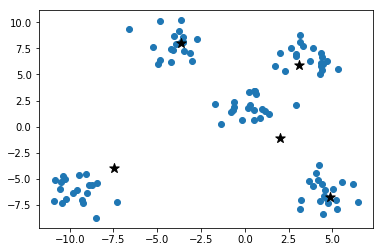

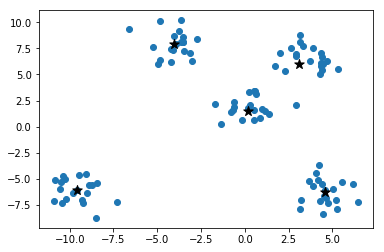

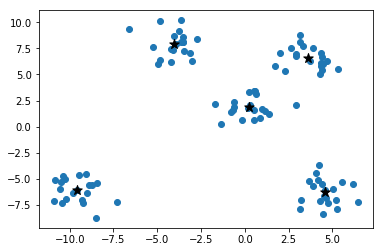

In [105]:
k = 5
final_mu = Kmeans(X, k,max_iter=3) #after three iteration points move to its correct position

In [106]:
final_mu

[array([3.62186823, 6.59111541]),
 array([0.23713963, 1.85541645]),
 array([-9.56458048, -6.09665251]),
 array([-4.05050671,  7.90104677]),
 array([ 4.58002297, -6.28061932])]

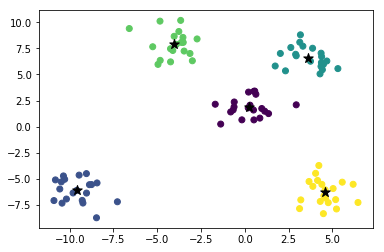

In [107]:
# plotting final data
plt.scatter(X[:,0], X[:,1],c=Y)
for i in range(k):
    plt.scatter(final_mu[i][0],final_mu[i][1], c = 'k',marker='*',s=100)